Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import eesr

# Functions

In [ ]:
# Creates a dataframe with the results of the experiments based on the parameters.
def create_dataframe(path_ex, file_name, dcs = '', tpp = ''):
    select_dcs = "dcs_" + dcs
    select_tpp = "tpp_" + tpp
    df = pd.DataFrame()
    for folder in next(os.walk(path_ex))[1]:
        if (select_dcs in folder) & (select_tpp in folder):
            file_path = os.path.join(path_ex, folder, file_name)
            if '.tsv' in file_name:
              data = pd.read_csv(file_path, delimiter='\t')
            else:
              data = pd.read_csv(file_path, delimiter=',')
            data['trace_name'] = folder
            df = pd.concat([df, data])

    return df

# Creates a dataframe with the environment stats of the specified file.
def create_env_dataframe(path_ex, trace_name):
    file_name = 'environment.csv'
    df = pd.DataFrame()
    for folder in next(os.walk(path_ex))[1]:
        if (trace_name in folder):
            file_path = os.path.join(path_ex, folder, file_name)
            data = pd.read_csv(file_path)
            data['trace_name'] = folder
            df = pd.concat([df, data])
    return df

# Splits the environment dataframe into a dataframe for each environment and writes it to a csv file.
# def split_env_dataframe(df, path_ex):



# Variables

Experiment paths

In [ ]:
path_ex1 = '../EX_1/'
path_ex2 = '../EX_2/'

colors = ['lightcoral', 'steelblue', 'yellowgreen']

Datacentre dependent dataframes

In [ ]:
stats_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='')
stats_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='2', tpp='')

summary_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='')
summary_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='2', tpp='')

tasks_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='1', tpp='')
tasks_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='2', tpp='')

workflows_dc1_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='1', tpp='')
workflows_dc2_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='2', tpp='')

Fastest Machine Placement variables

In [ ]:
stats_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='fastest_machine')
stats_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='2', tpp='fastest_machine')

summary_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='fastest_machine')
summary_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='2', tpp='fastest_machine')

tasks_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='1', tpp='fastest_machine')
tasks_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='2', tpp='fastest_machine')

workflows_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='1', tpp='fastest_machine')
workflows_dc2_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='2', tpp='fastest_machine')

Look Ahead Placement variables

In [ ]:
stats_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='look_ahead')
stats_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='2', tpp='look_ahead')

summary_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='1', tpp='look_ahead')
summary_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'summary.tsv', dcs='2', tpp='look_ahead')

tasks_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='1', tpp='look_ahead')
tasks_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'tasks.tsv', dcs='2', tpp='look_ahead')

workflows_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='1', tpp='look_ahead')
workflows_dc2_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'workflows.tsv', dcs='2', tpp='look_ahead')

# Exploration

In [ ]:
stats_dc1_df[stats_dc1_df['trace_name'] == 'askalon-new_ee68_parquet_tpp_look_ahead_dcs_1']

In [ ]:
stats_dc1_df[stats_dc1_df['AvgResourceUsage'] >= 0.1]

In [ ]:
stats_dc1_df.describe()

In [ ]:
sns.heatmap(stats_dc1_df.corr(), annot=True)

In [ ]:
stats_dc1_df.boxplot(column=['AvgResourceUsage'])

In [ ]:
stats_dc2_df[stats_dc2_df['AvgResourceUsage'] >= 0.03]

In [ ]:
baseline_performance_dc1 = create_dataframe(path_ex1, 'tasks.tsv', '1', 'fastest_machine')
lookahead_performance_dc1 = create_dataframe(path_ex1, 'tasks.tsv', '1', 'look_ahead')

lookahead_performance_dc1

# Validation

In [ ]:
print(tasks_dc1_fmp_df.groupby('trace_name').sum()['energy.consumed'].describe())
tasks_dc1_lah_df.groupby('trace_name').sum()['energy.consumed'].describe()

In [ ]:
bl = tasks_dc1_fmp_df.groupby('trace_name').sum()['energy.consumed'].sum()
nl = tasks_dc1_lah_df.groupby('trace_name').sum()['energy.consumed'].sum()

difference_percentage = (nl - bl) / bl * 100
print(difference_percentage, '%')
print('Baseline: ', bl)
print('Lookahead: ', nl)

# plot the results in a horizontal bar chart with difference percentage

bar_height = 0.5
fig, ax = plt.subplots(figsize=(7, 1.5))
ax.barh('Fastest Machine + DVFS', bl, color=colors[0], height=bar_height)
ax.barh('Lookahead + DVFS', nl, color=colors[1], height=bar_height)
ax.set_title('Task energy consumption for one datacentre')
ax.set_xlabel('Energy consumption [kWh]')
ax.set_ylabel('Method')
# ax.margins(y=0.01)
ax.margins(x=0.1)
# ax.text(bl, 0, str(round(bl, 2)), color='black', fontweight='bold')
ax.text(nl, 1, str(round(difference_percentage, 2))+'%', color='black', fontweight='bold')
plt.show()

''' 
TODO:
increase text size (figure text at least as big as text in caption)
axes labels size of caption text
increase method and Energy consumption text size (125% of lah and baseline text size)
Task energy consumption for one datacentre (150% or more of caption text size, but this will be the actual caption in the paper)

Decrease the size of the bars (vertically) (2x size of text in method type)

blue first one
50% of the intensity first blue for the second one
(or Laurens' color scheme)

convert to MWh (maybe)

remove the paranthesis
'''

In [ ]:
# workflow_delays[ttp][dvfs_enabled][domain].extend(workflow_df['time.complete'] - workflow_df['time.earliest.complete'])
workflows_dc1_fmp_df['workflow_delays'] = workflows_dc1_fmp_df['time.complete'] - workflows_dc1_fmp_df['time.earliest.complete']
workflows_dc1_lah_df['workflow_delays'] = workflows_dc1_lah_df['time.complete'] - workflows_dc1_lah_df['time.earliest.complete']

In [ ]:
# calculate cumulative workflow delays
total_delay_fmp = workflows_dc1_fmp_df['workflow_delays'].sum()
total_delay_lah = workflows_dc1_lah_df['workflow_delays'].sum()

# calculate the percentage of delay
delay_percentage = (total_delay_lah - total_delay_fmp) / total_delay_fmp * 100
print(delay_percentage, '%')
print('Baseline: ', total_delay_fmp)
print('Lookahead: ', total_delay_lah)

# # plot the results in a horizontal bar chart with difference percentage
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.barh('Baseline\n(Fastest Machine + DVFS)', total_delay_fmp, color='red')
# ax.barh('Lookahead + DVFS', total_delay_lah, color='green')
# ax.set_title('Workflow delays for one datacentre')
# ax.set_xlabel('Delay [s]')
# ax.set_ylabel('Method')
# # ax.text(bl, 0, str(round(bl, 2)), color='black', fontweight='bold')
# ax.text(total_delay_lah, 1, str(round(delay_percentage, 2))+'%', color='black', fontweight='bold')
# plt.show()


bar_height = 0.5
fig, ax = plt.subplots(figsize=(7, 1.5))
ax.barh('Fastest Machine + DVFS', total_delay_fmp, color=colors[0], height=bar_height)
ax.barh('Lookahead + DVFS', total_delay_lah, color=colors[1], height=bar_height)
ax.set_title('Task energy consumption for one datacentre')
ax.set_xlabel('Energy consumption [kWh]')
ax.set_ylabel('Method')
# ax.margins(y=0.01)
ax.margins(x=0.14)
# ax.text(bl, 0, str(round(bl, 2)), color='black', fontweight='bold')
ax.text(total_delay_lah, 1, '+'+str(round(delay_percentage, 2))+'%', color='black', fontweight='bold')
plt.show()

Notes:
Also show workflow Slowdown (box and whisker plot + violin plot) (workflow normalized schedule length)

# Experiment 1

**Process**:
1. Select from the 1 DC runs:
    * a) one representative trace for each target utilization in increments of 10%
    * b) one trace with average, shortest and longest running times
2. Compute utilization graphs for 
    * a) fastest machine placement (fmp)
    * b) lookahead (lah) placement
    * c) compare fmp in 1 DC vs 2 DC
    * d) compare lah in 1 DC vs 2 DC
3. Calculate total energy consumption (including idle consumption) for each trace
4. Select the corresponding traces from the 2 DC runs
5. Run the DCs in different country configurations and show the results from EESR

1.a)

In [ ]:
stats_dc1_fmp_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='fastest_machine')
utilization_candidates_fmp = stats_dc1_fmp_df.sort_values(by=['AvgResourceUsage'], ascending=False)[['trace_name', 'AvgResourceUsage']]
utilization_candidates_fmp['AvgResourceUsage'] = utilization_candidates_fmp['AvgResourceUsage'].apply(lambda x: round(x, 3))
print(utilization_candidates_fmp)

stats_dc1_lah_df = create_dataframe(path_ex=path_ex1, file_name = 'stats.tsv', dcs='1', tpp='look_ahead')
utilization_candidates_lah = stats_dc1_lah_df.sort_values(by=['AvgResourceUsage'], ascending=False)[['trace_name', 'AvgResourceUsage']]
utilization_candidates_lah['AvgResourceUsage'] = utilization_candidates_lah['AvgResourceUsage'].apply(lambda x: round(x, 3))
print(utilization_candidates_lah)

1.b)

In [ ]:
duration_stats = stats_dc1_fmp_df['TraceDuration'].describe()

max_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] == duration_stats['max']].sort_values(by=['AvgResourceUsage'], ascending=False)['trace_name'].values[0]
median_high_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] <= duration_stats['50%']].sort_values(by=['TraceDuration'], ascending=False)['trace_name'].values[0]
median_low_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] >= duration_stats['50%']].sort_values(by=['TraceDuration'], ascending=True)['trace_name'].values[0]
min_duration_trace = stats_dc1_fmp_df[stats_dc1_fmp_df['TraceDuration'] == duration_stats['min']].sort_values(by=['AvgResourceUsage'], ascending=False)['trace_name'].values[0]

duration_candidates = {'max': max_duration_trace, 
                       'median-high': median_high_duration_trace, 
                       'median-low': median_low_duration_trace,
                       'min': min_duration_trace} # use the shortest usable one
duration_candidates

'''
Add these as well
'''

2.a),b)

In [ ]:
def get_energy_consumption(num_machines, timeframe, idleTDP, TDP):
    total_TDP = TDP * num_machines   # total TDP of all machines
    total_idleTDP = idleTDP * num_machines   # total idle TDP of all machines
    theoretical_max = total_TDP * timeframe * 3600   # Total TDP for 15 minutes converted to Joules
    theoretical_min = total_idleTDP * timeframe * 3600
    theoretical_min_dvfs = theoretical_min * (1 - 0.126) # maximum DVFS reduction
    return theoretical_max, theoretical_min, theoretical_min_dvfs

num_machines = 9
TDP = 225
idleTDP = 100
timeframe = 0.25 # 15 minutes

In [ ]:
graph_counter = 0
conversion_factor = 1_000_000
conversion_name = 'M'

theoretical_max, theoretical_min, theoretical_min_dvfs = get_energy_consumption(num_machines, timeframe, idleTDP, TDP)
theoretical_max = theoretical_max / conversion_factor
theoretical_min = theoretical_min / conversion_factor
theoretical_min_dvfs = theoretical_min_dvfs / conversion_factor

for i in range(len(utilization_candidates_fmp)):
    if graph_counter > 6:
        break
    fmp_name = utilization_candidates_fmp.iloc[i]['trace_name']
    lah_name = utilization_candidates_lah.iloc[i]['trace_name']

    fmp_env = create_env_dataframe(path_ex1, fmp_name)
    lah_env = create_env_dataframe(path_ex1, lah_name)
    top_limit = 2000000

    # convert to kJ
    fmp_env['it_power_total'] = fmp_env['it_power_total'] / conversion_factor
    lah_env['it_power_total'] = lah_env['it_power_total'] / conversion_factor
    top_limit = top_limit / conversion_factor


    # plot fmp and lah it power total
    if len(fmp_env) > 2:
        fig, ax = plt.subplots(figsize=(10, 5))

        # '-', '--', '-.', ':'
        ax.plot(fmp_env['timestamp'], fmp_env['it_power_total'], color=colors[0], label='FMP', linestyle='-.')
        ax.plot(lah_env['timestamp'], lah_env['it_power_total'], color=colors[1], label='LAH', linestyle='--')
        ax.axhline(y=theoretical_max, color='red', linestyle='-', label=f'Max = {round(theoretical_max, 2)}', alpha=0.3)
        ax.axhline(y=theoretical_min, color='green', linestyle=':', label=f'Idle = {round(theoretical_min, 2)}', alpha=0.3)
        ax.axhline(y=theoretical_min_dvfs, color='blue', linestyle=':', label=f'Idle with DVFS = {round(theoretical_min_dvfs, 2)}', alpha=0.3)

        plt.fill_between(fmp_env['timestamp'], 0, theoretical_min_dvfs, facecolor='black', alpha=0.3)
        plt.fill_between(fmp_env['timestamp'], theoretical_max, top_limit, facecolor='red', alpha=0.3)
        ax.grid(True)

        ax.set_title('IT power consumption for trace: ' + fmp_name
                      + '\nAverage power consumption: ' + utilization_candidates_fmp.iloc[i]['AvgResourceUsage'].astype(str))
        ax.set_xlabel('Time [s]')
        ax.set_ylabel(f'Power [{conversion_name}J]')
        
        ax.set_ylim(0, top_limit)

        ax.legend()
        plt.show()
        
        graph_counter += 1
    else:
        print('trace too short: ', fmp_name, ' ', len(fmp_env))
''' 
y axis start from 0 - done

for traces that show no movement for a long time, truncate them (specify in the thesis)

add lines for idle and max power consumption
'''

2.c)

In [ ]:
def cumulative_plots(df, title, ylabel, xlabel, conversion_factor, conversion_name, top_limit):
    



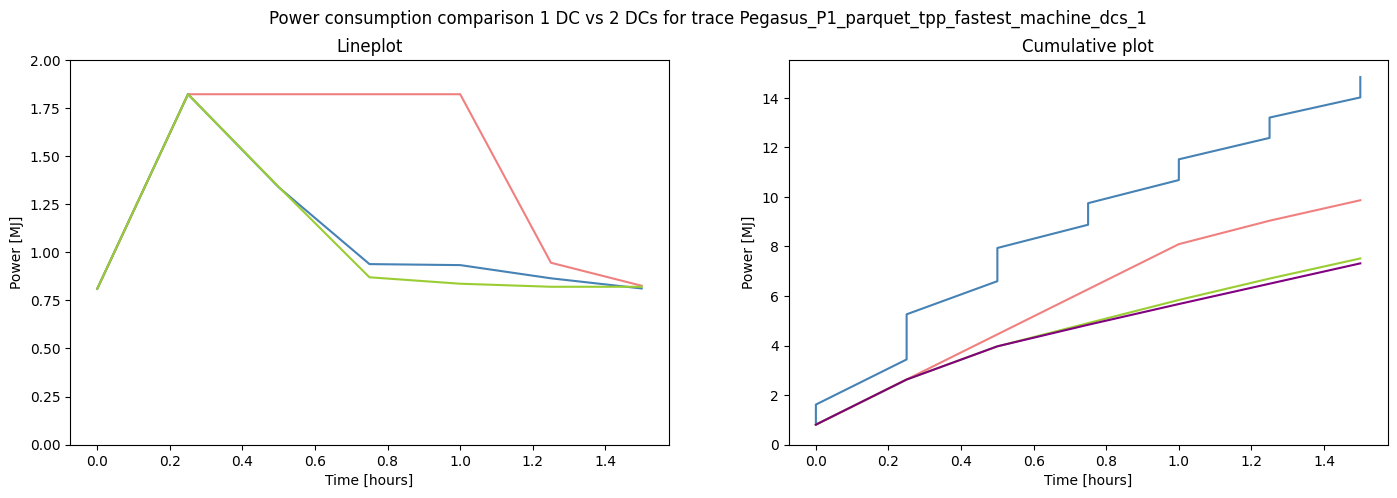

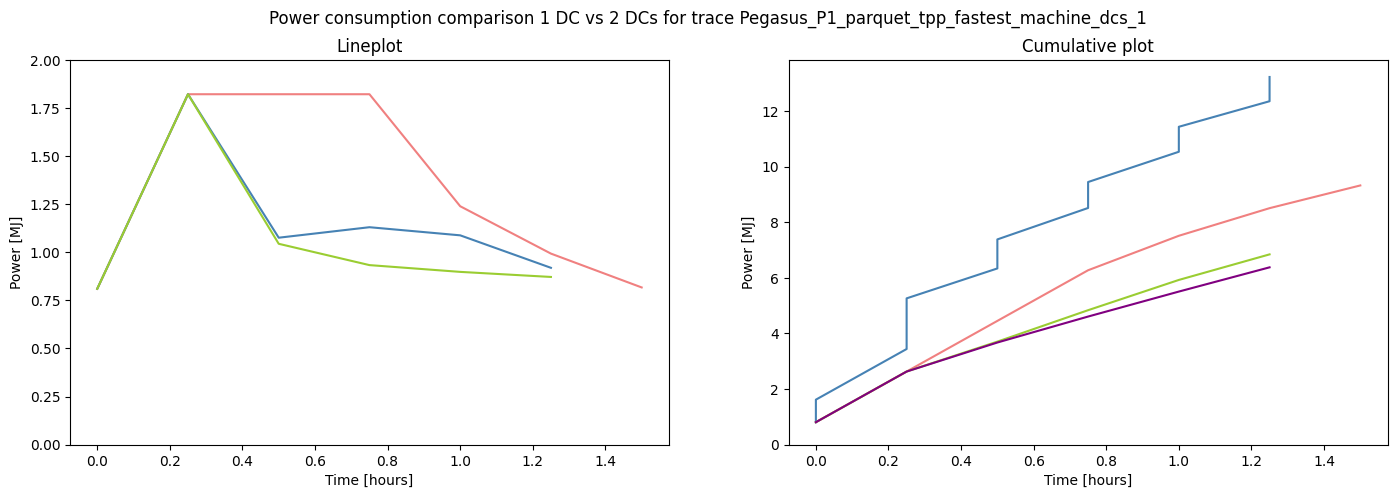

trace too short:  workflowhub_epigenomics_dataset-ilmn_chameleon-cloud_schema-0-2_epigenomics-ilmn-100000-cc-run004_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_chameleon-cloud_schema-0-2_epigenomics-hep-100000-cc-run005_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-hep_futuregrid_schema-0-2_epigenomics-hep-fg-run001_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P6a_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  workflowhub_epigenomics_dataset-taq_chameleon-cloud_schema-0-2_epigenomics-taq-100000-cc-run002_parquet_tpp_fastest_machine_dcs_1   1


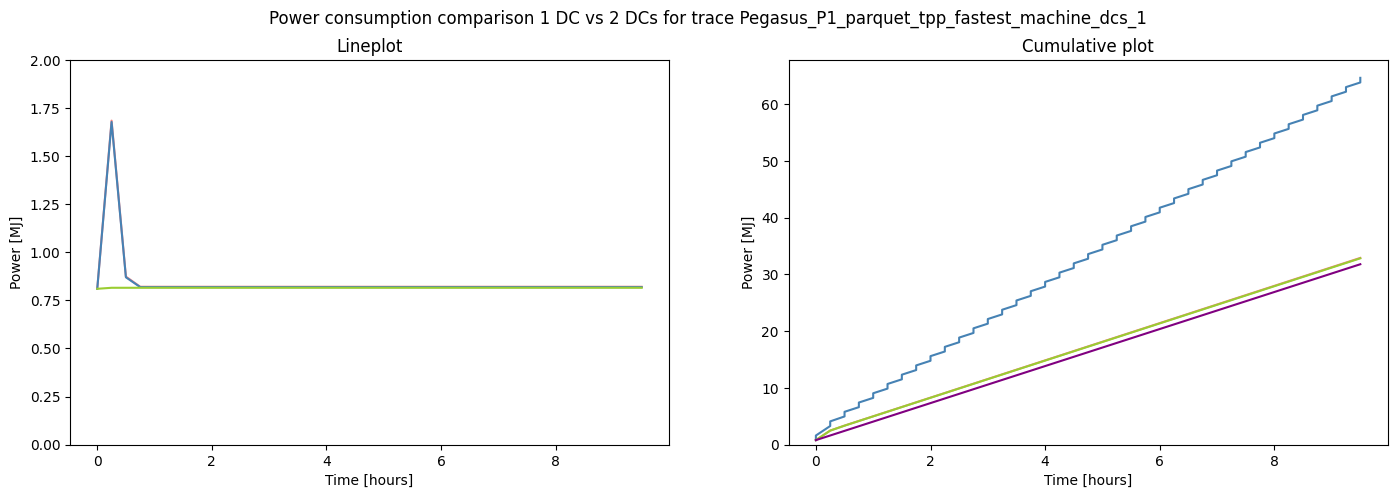

trace too short:  Pegasus_P6b_parquet_tpp_fastest_machine_dcs_1   1


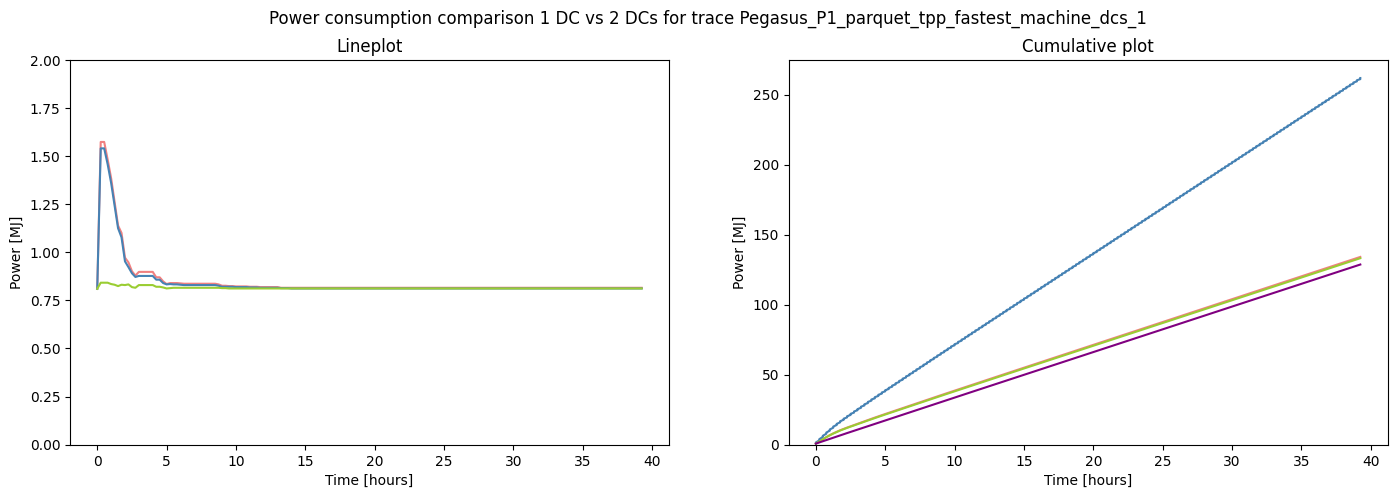

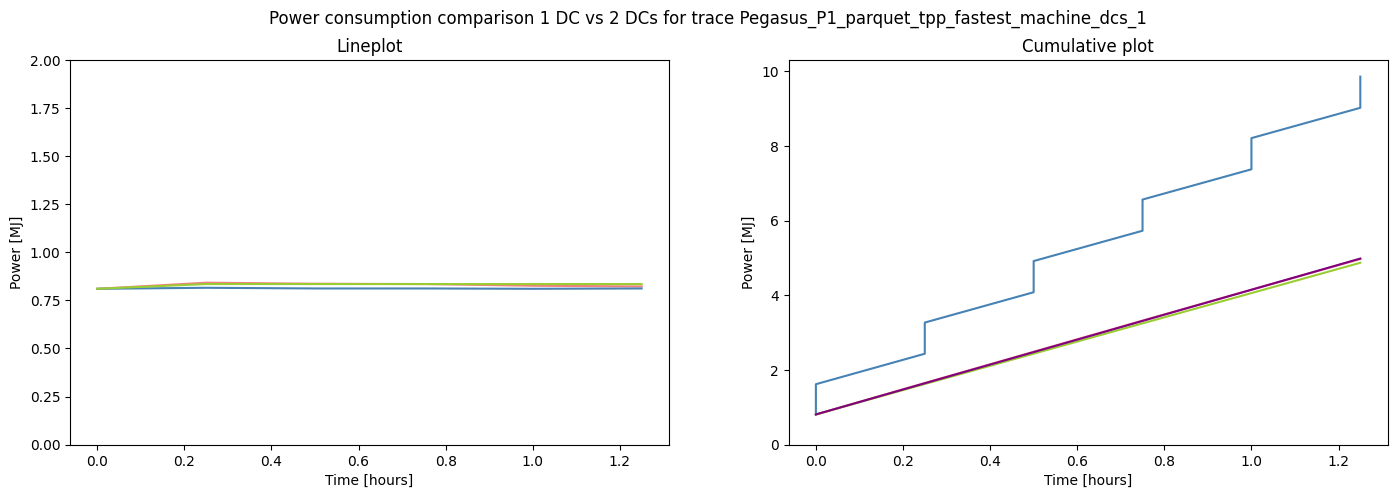

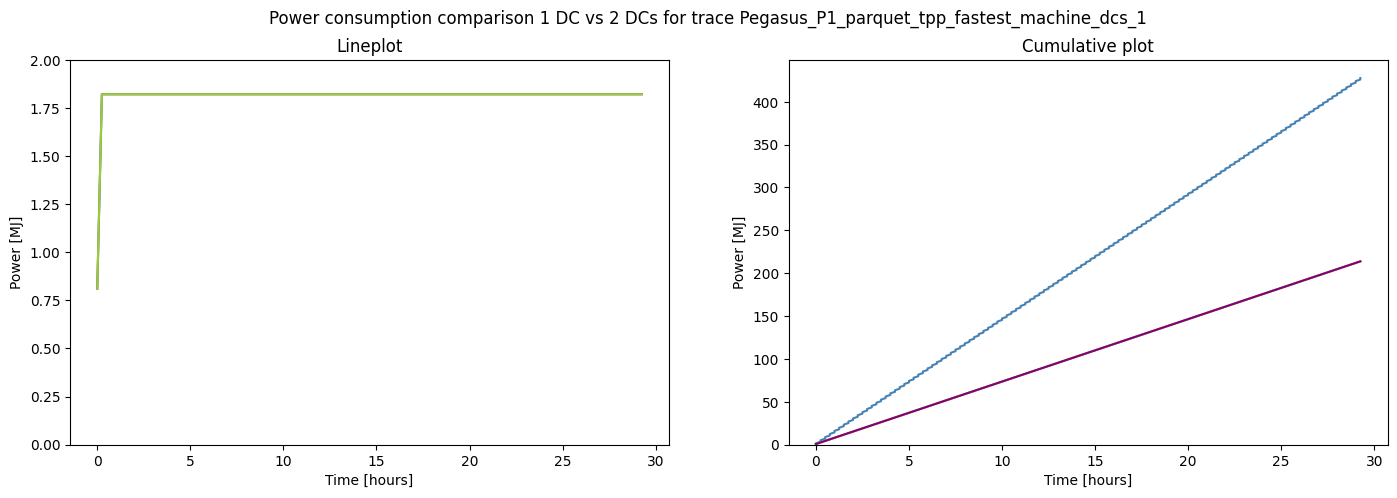

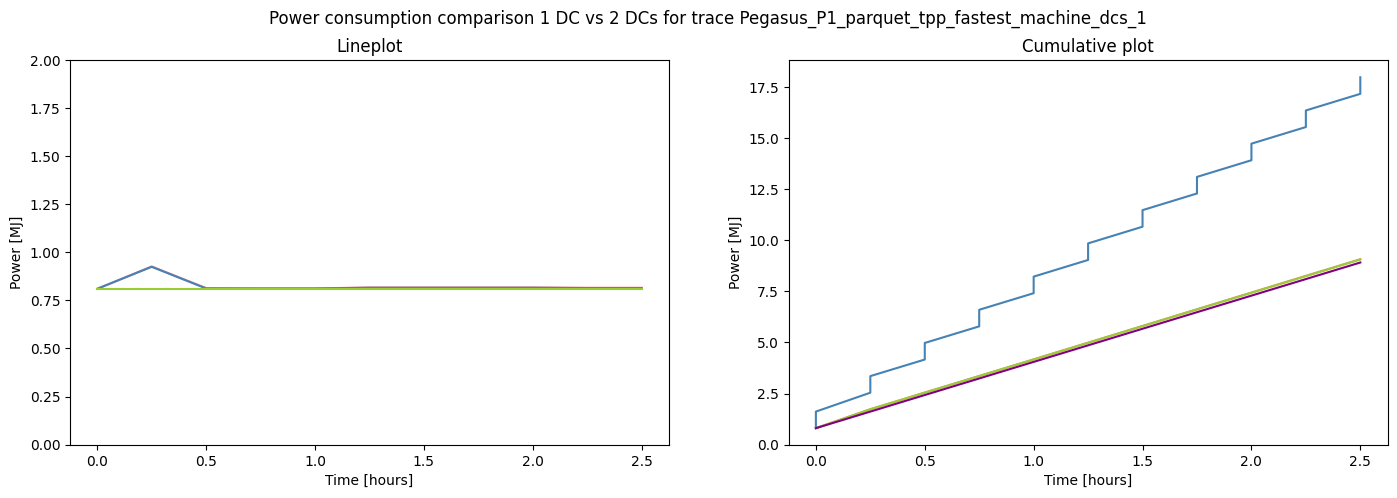

' \nadd cumulative plot for the 2 DCs: \n  - 1 curve with total energy consumption for 2 DCs\n  - individual curves for each DC with different line styles\n+ comments from above\nchange line styles for the 2 DCs\nyou can also leave data in seconds and add bars to separate days\n(i.e., two subplots)\n'

In [53]:
vs_graph_counter = 0
conversion_factor = 1_000_000
conversion_name = 'M'

top_limit = 2000000
top_limit = top_limit / conversion_factor

for i in range(len(utilization_candidates_fmp)):
    if vs_graph_counter > 6:
        break
    fmp_name_dc_1 = utilization_candidates_fmp.iloc[i]['trace_name']
    fmp_name_dc_2 = utilization_candidates_fmp.iloc[i]['trace_name'][:-1] + '2'
    
    fmp_env_dc_1 = create_env_dataframe(path_ex1, fmp_name_dc_1)
    fmp_env_dc_2 = create_env_dataframe(path_ex1, fmp_name_dc_2)

    fmp_env_dc_1['it_power_total'] = fmp_env_dc_1['it_power_total'] / conversion_factor
    fmp_env_dc_2['it_power_total'] = fmp_env_dc_2['it_power_total'] / conversion_factor

    fmp_env_dc_1['timestamp'] = fmp_env_dc_1['timestamp'] / 1000 / 60 / 60
    fmp_env_dc_2['timestamp'] = fmp_env_dc_2['timestamp'] / 1000 / 60 / 60

    # fmp_env['it_power_total']

    # plot fmp and lah it power total
    if len(fmp_env_dc_1) > 2:
        fig, (ax, ax1) = plt.subplots(1, 2, figsize=(17, 5))
        ax.plot(fmp_env_dc_1['timestamp'], fmp_env_dc_1['it_power_total'], color=colors[0], label='FMP')
        ax.plot(fmp_env_dc_2[fmp_env_dc_2['host_id'] == '0-0']['timestamp'], fmp_env_dc_2[fmp_env_dc_2['host_id'] == '0-0']['it_power_total'], color = colors[1])
        ax.plot(fmp_env_dc_2[fmp_env_dc_2['host_id'] == '1-1']['timestamp'], fmp_env_dc_2[fmp_env_dc_2['host_id'] == '1-1']['it_power_total'], color = colors[2])

        ax1.plot(fmp_env_dc_1['timestamp'], fmp_env_dc_1['it_power_total'].cumsum(), color=colors[0], label='FMP')
        ax1.plot(fmp_env_dc_2['timestamp'], fmp_env_dc_2['it_power_total'].cumsum(), color = colors[1])
        ax1.plot(fmp_env_dc_2[fmp_env_dc_2['host_id'] == '0-0']['timestamp'], fmp_env_dc_2[fmp_env_dc_2['host_id'] == '0-0']['it_power_total'].cumsum(), color = colors[2])
        ax1.plot(fmp_env_dc_2[fmp_env_dc_2['host_id'] == '1-1']['timestamp'], fmp_env_dc_2[fmp_env_dc_2['host_id'] == '1-1']['it_power_total'].cumsum(), color = 'purple')
        # ax.set_title('IT power consumption for trace: ' + fmp_name[:-1]
        #               + '\nAverage power consumption: ' + utilization_candidates_fmp.iloc[i]['AvgResourceUsage'].astype(str))
        # ax.set_xlabel('Time [s]')
        # ax.set_ylabel('Power [J]')
        # ax.legend()
        ax.set_title('Lineplot')
        ax1.set_title('Cumulative plot')
        # ax2.set_title('2 DCs - DC 2')
        
        ax.set_xlabel('Time [hours]')
        ax.set_ylabel(f'Power [{conversion_name}J]')
        ax1.set_xlabel('Time [hours]')
        ax1.set_ylabel(f'Power [{conversion_name}J]')

        ax.set_ylim(0, top_limit)
        ax1.set_ylim(0)
        
        fig.suptitle('Power consumption comparison 1 DC vs 2 DCs for trace ' + fmp_name)
        plt.show()
        
        vs_graph_counter += 1
    else:
        print('trace too short: ', fmp_name_dc_1, ' ', len(fmp_env_dc_1))

''' 
add cumulative plot for the 2 DCs: 
  - 1 curve with total energy consumption for 2 DCs
  - individual curves for each DC with different line styles
+ comments from above
change line styles for the 2 DCs
you can also leave data in seconds and add bars to separate days
(i.e., two subplots)
'''

2.d)

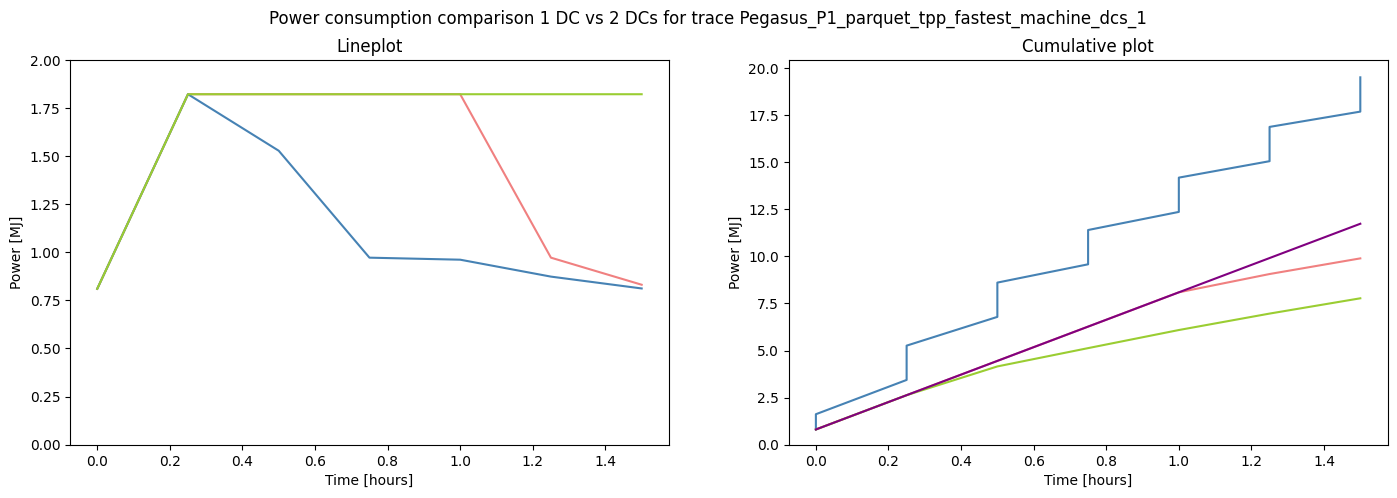

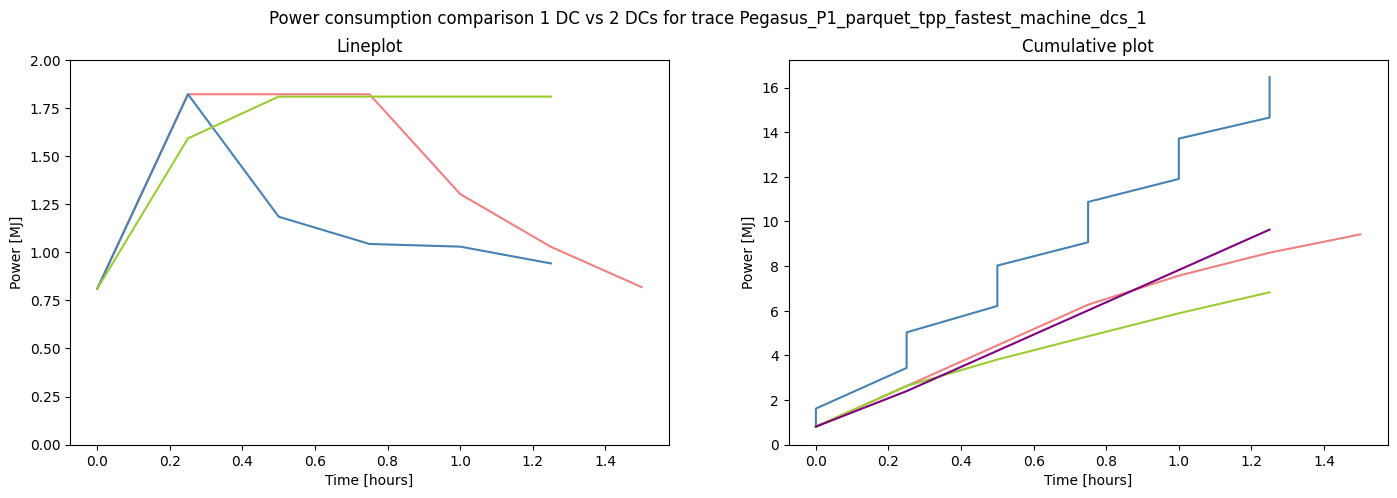

trace too short:  Pegasus_P1_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P1_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P1_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P1_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P1_parquet_tpp_fastest_machine_dcs_1   1
trace too short:  Pegasus_P1_parquet_tpp_fastest_machine_dcs_1   1


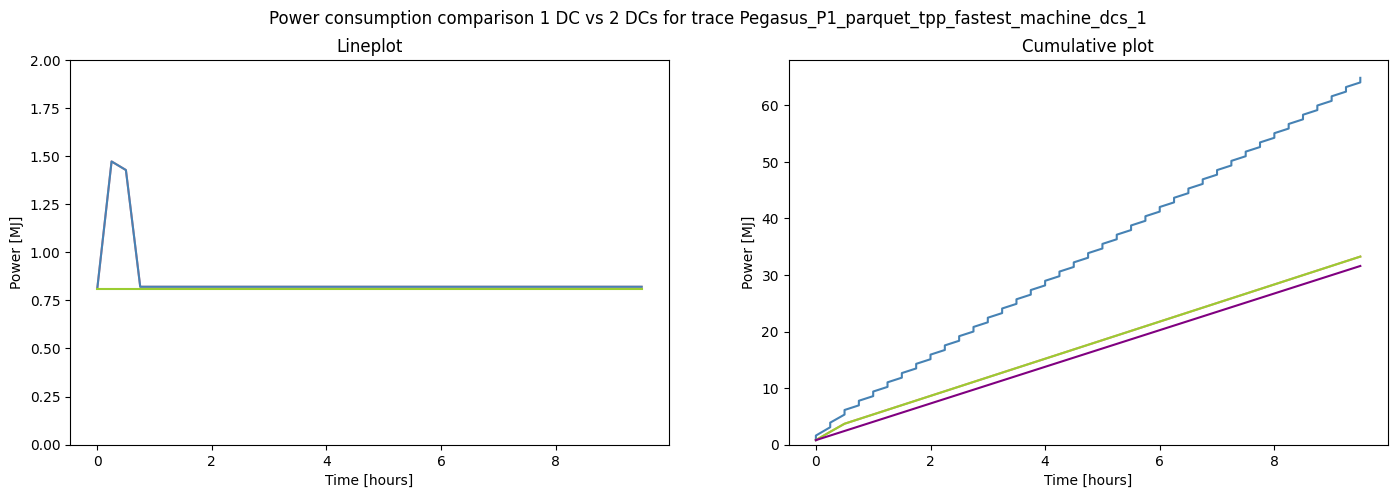

trace too short:  Pegasus_P1_parquet_tpp_fastest_machine_dcs_1   1


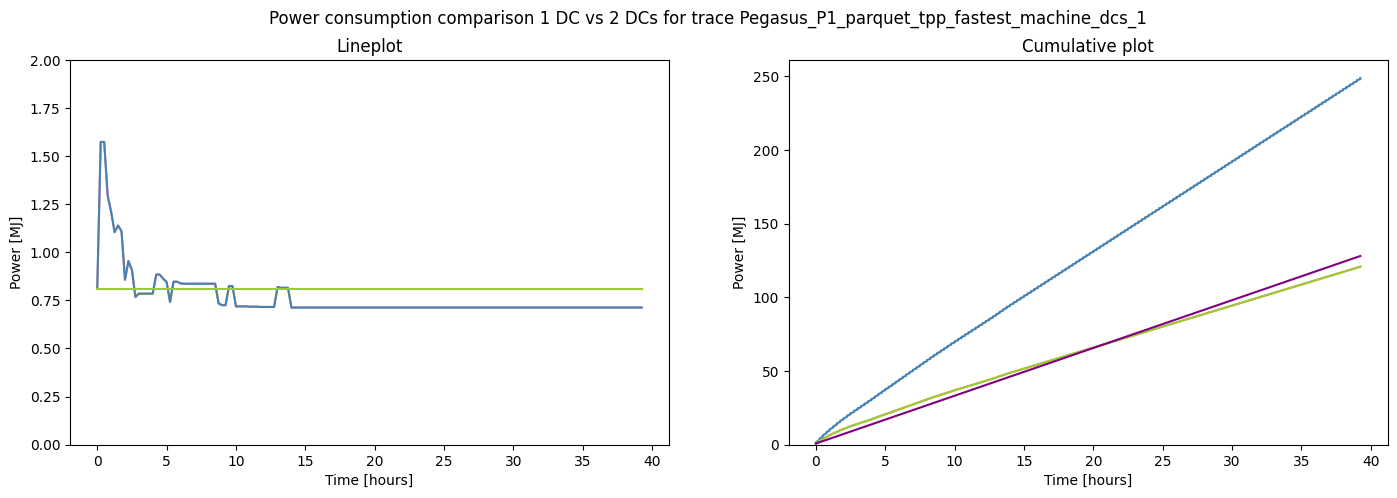

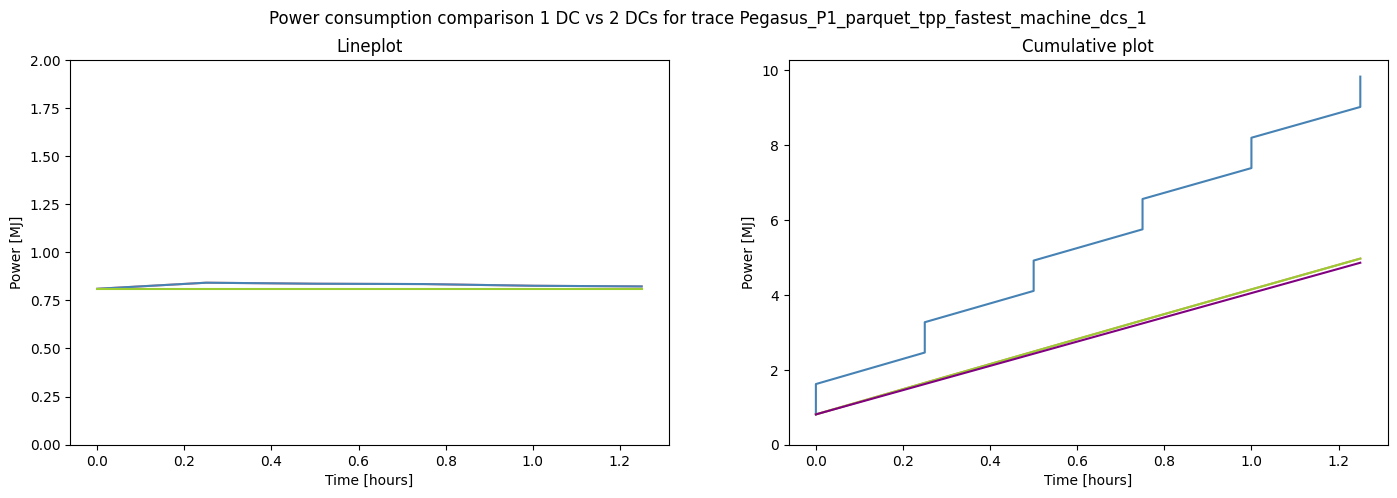

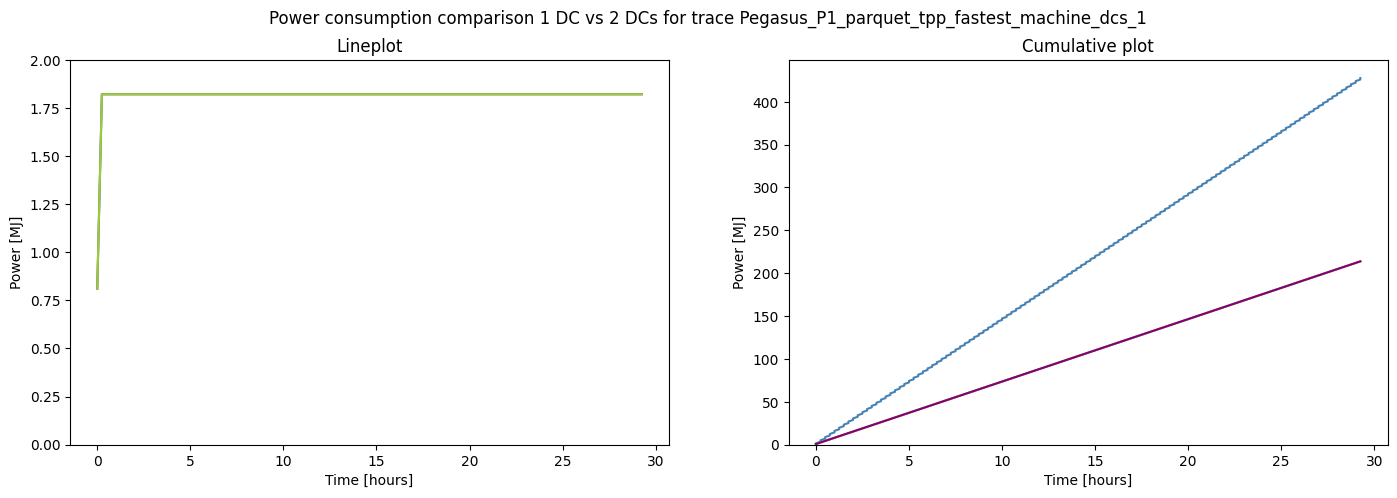

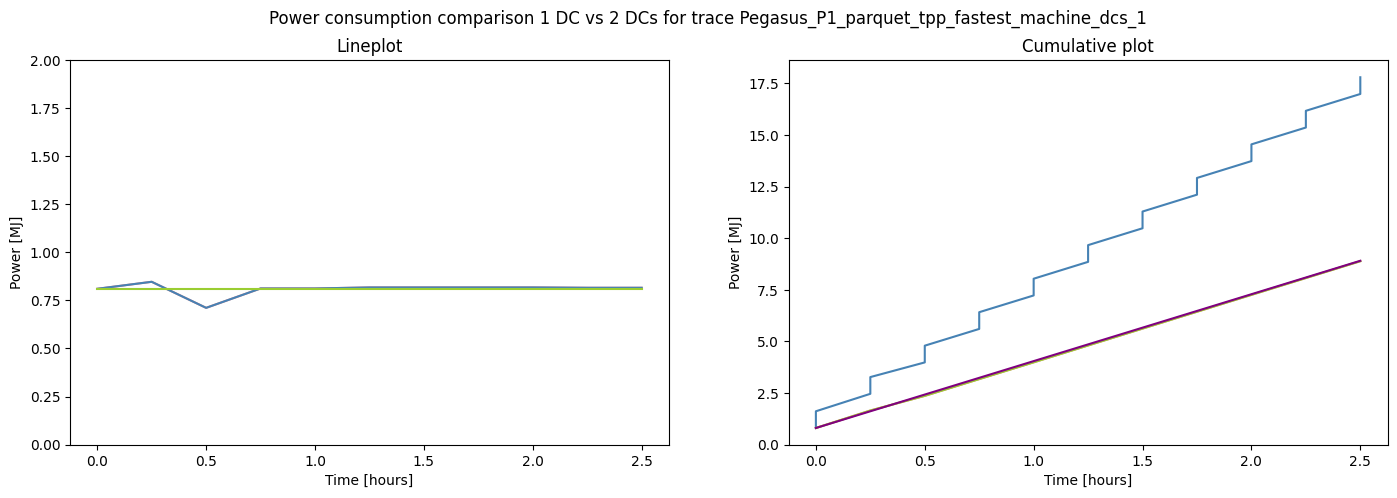

In [54]:
vs_graph_counter = 0

vs_graph_counter = 0
conversion_factor = 1_000_000
conversion_name = 'M'

top_limit = 2000000
top_limit = top_limit / conversion_factor

for i in range(len(utilization_candidates_lah)):
    if vs_graph_counter > 6:
        break
    lah_name_dc_1 = utilization_candidates_lah.iloc[i]['trace_name']
    lah_name_dc_2 = utilization_candidates_lah.iloc[i]['trace_name'][:-1] + '2'
    
    lah_env_dc_1 = create_env_dataframe(path_ex1, lah_name_dc_1)
    lah_env_dc_2 = create_env_dataframe(path_ex1, lah_name_dc_2)

    lah_env_dc_1['it_power_total'] = lah_env_dc_1['it_power_total'] / conversion_factor
    lah_env_dc_2['it_power_total'] = lah_env_dc_2['it_power_total'] / conversion_factor

    lah_env_dc_1['timestamp'] = lah_env_dc_1['timestamp'] / 1000 / 60 / 60
    lah_env_dc_2['timestamp'] = lah_env_dc_2['timestamp'] / 1000 / 60 / 60

    # fmp_env['it_power_total']

    # plot fmp and lah it power total
    if len(lah_env_dc_1) > 2:
        fig, (ax, ax1) = plt.subplots(1, 2, figsize=(17, 5))
        ax.plot(lah_env_dc_1['timestamp'], lah_env_dc_1['it_power_total'], color=colors[0], label='FMP')
        ax.plot(lah_env_dc_2[lah_env_dc_2['host_id'] == '0-0']['timestamp'], lah_env_dc_2[lah_env_dc_2['host_id'] == '0-0']['it_power_total'], color = colors[1])
        ax.plot(lah_env_dc_2[lah_env_dc_2['host_id'] == '1-1']['timestamp'], lah_env_dc_2[lah_env_dc_2['host_id'] == '1-1']['it_power_total'], color = colors[2])

        ax1.plot(lah_env_dc_1['timestamp'], lah_env_dc_1['it_power_total'].cumsum(), color=colors[0], label='FMP')
        ax1.plot(lah_env_dc_2['timestamp'], lah_env_dc_2['it_power_total'].cumsum(), color = colors[1])
        ax1.plot(lah_env_dc_2[lah_env_dc_2['host_id'] == '0-0']['timestamp'], lah_env_dc_2[lah_env_dc_2['host_id'] == '0-0']['it_power_total'].cumsum(), color = colors[2])
        ax1.plot(lah_env_dc_2[lah_env_dc_2['host_id'] == '1-1']['timestamp'], lah_env_dc_2[lah_env_dc_2['host_id'] == '1-1']['it_power_total'].cumsum(), color = 'purple')
        # ax.set_title('IT power consumption for trace: ' + fmp_name[:-1]
        #               + '\nAverage power consumption: ' + utilization_candidates_fmp.iloc[i]['AvgResourceUsage'].astype(str))
        # ax.set_xlabel('Time [s]')
        # ax.set_ylabel('Power [J]')
        # ax.legend()
        ax.set_title('Lineplot')
        ax1.set_title('Cumulative plot')
        # ax2.set_title('2 DCs - DC 2')
        
        ax.set_xlabel('Time [hours]')
        ax.set_ylabel(f'Power [{conversion_name}J]')
        ax1.set_xlabel('Time [hours]')
        ax1.set_ylabel(f'Power [{conversion_name}J]')

        ax.set_ylim(0, top_limit)
        ax1.set_ylim(0)
        
        fig.suptitle('Power consumption comparison 1 DC vs 2 DCs for trace ' + fmp_name)
        plt.show()
        
        vs_graph_counter += 1
    else:
        print('trace too short: ', fmp_name_dc_1, ' ', len(lah_env_dc_1))


# Analysis

In [ ]:
avg_res_10 = stats_dc1_df[stats_dc1_df['AvgResourceUsage'] >= 0.05].trace_name.values
avg_res_10

In [ ]:
wawa = create_dataframe(path_ex1, 'environment.csv')
wawa

In [ ]:
wawa[wawa['trace_name'] == 'workflowhub_epigenomics_dataset-hep_grid5000_schema-0-2_epigenomics-hep-g5k-run001_parquet_tpp_fastest_machine_dcs_1']
# wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_look_ahead_dcs_1'].plot(x='timestamp', y='it_power_total')

# line1 = plt.plot([1, 3, 5, 2, 5, 3, 1], c='red', lw=5)
# line2 = plt.plot([7, 2, 5, 7, 5, 2, 7], c='green', lw=5)
# plt.show()

# plt.plot(wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_fastest_machine_dcs_1'].timestamp, wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_fastest_machine_dcs_1'].it_power_total, c='red', alpha=0.5)
# plt.plot(wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_look_ahead_dcs_1'].timestamp, wawa[wawa['trace_name'] == 'spec_trace-1_parquet_tpp_look_ahead_dcs_1'].it_power_total, c='blue', alpha=0.5)
# plt.show()

In [ ]:
for i in range(0, len(avg_res_10)):
    if i % 2 == 1: continue
    plt.plot(wawa[wawa['trace_name'] == avg_res_10[i]].timestamp, wawa[wawa['trace_name'] == avg_res_10[i]].it_power_total, alpha=0.5, c='red')
    i += 1
    plt.plot(wawa[wawa['trace_name'] == avg_res_10[i]].timestamp, wawa[wawa['trace_name'] == avg_res_10[i]].it_power_total, alpha=0.5, c='blue')
    plt.show()